## Disclaimer: The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

## Dataset description: It has 6 columns <br>
1. Id
2. SepalLengthCm
3. SepalWidthCm
4. PetalLengthCm
5. PetalWidthCm
6. Species<br>

## Task: You will use the Iris diabetes dataset. The dataset corresponds to a clustering problem on which you need to make predictions based on given the 3 iris species with 50 samples each, as well as some properties about each flower in the dataset. You are asked to predict the classes of flowers by using K-means and Hierarchical Clustering methods.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
df = copy.deepcopy(data)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.shape

(150, 6)

In [7]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
data = iris.data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(data_scaled)

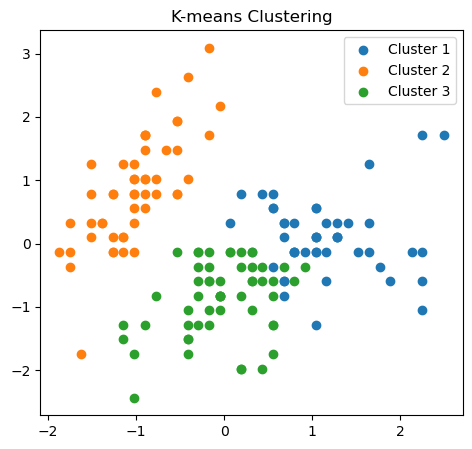

In [11]:
unique_kmeans_labels = np.unique(kmeans_labels)
kmeans_cluster_names = ["Cluster 1", "Cluster 2", "Cluster 3"]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("K-means Clustering")

for label, cluster_name in zip(unique_kmeans_labels, kmeans_cluster_names):
    plt.scatter(data_scaled[kmeans_labels == label, 0], data_scaled[kmeans_labels == label, 1], label=cluster_name)

plt.legend()
plt.show()

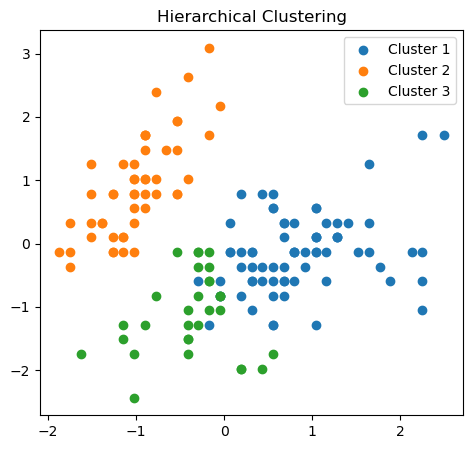

In [12]:
unique_agg_labels = np.unique(agg_labels)
agg_cluster_names = ["Cluster 1", "Cluster 2", "Cluster 3"]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.title("Hierarchical Clustering")

for label, cluster_name in zip(unique_agg_labels, agg_cluster_names):
    plt.scatter(data_scaled[agg_labels == label, 0], data_scaled[agg_labels == label, 1], label=cluster_name)

plt.legend()
plt.show()

In [13]:
kmeans_df = pd.DataFrame(data_scaled, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
kmeans_df['K-means Cluster'] = kmeans_labels


print("K-means Clustered Data:")
print(kmeans_df.tail(50))

K-means Clustered Data:
     Feature 1  Feature 2  Feature 3  Feature 4  K-means Cluster
100   0.553333   0.558611   1.274295   1.712096                0
101  -0.052506  -0.822570   0.762758   0.922303                2
102   1.522676  -0.131979   1.217458   1.185567                0
103   0.553333  -0.362176   1.046945   0.790671                0
104   0.795669  -0.131979   1.160620   1.317199                0
105   2.128516  -0.131979   1.615320   1.185567                0
106  -1.143017  -1.282963   0.421734   0.659038                2
107   1.765012  -0.362176   1.444807   0.790671                0
108   1.038005  -1.282963   1.160620   0.790671                0
109   1.643844   1.249201   1.331133   1.712096                0
110   0.795669   0.328414   0.762758   1.053935                0
111   0.674501  -0.822570   0.876433   0.922303                0
112   1.159173  -0.131979   0.990108   1.185567                0
113  -0.173674  -1.282963   0.705921   1.053935                2
1

In [14]:
agg_df = pd.DataFrame(data_scaled, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
agg_df['Hierarchical Cluster'] = agg_labels

print("\nHierarchical Clustered Data:")
print(agg_df.head(81).tail(31))


Hierarchical Clustered Data:
    Feature 1  Feature 2  Feature 3  Feature 4  Hierarchical Cluster
50   1.401508   0.328414   0.535409   0.264142                     0
51   0.674501   0.328414   0.421734   0.395774                     0
52   1.280340   0.098217   0.649083   0.395774                     0
53  -0.416010  -1.743357   0.137547   0.132510                     2
54   0.795669  -0.592373   0.478571   0.395774                     0
55  -0.173674  -0.592373   0.421734   0.132510                     2
56   0.553333   0.558611   0.535409   0.527406                     0
57  -1.143017  -1.513160  -0.260315  -0.262387                     2
58   0.916837  -0.362176   0.478571   0.132510                     0
59  -0.779513  -0.822570   0.080709   0.264142                     2
60  -1.021849  -2.433947  -0.146641  -0.262387                     2
61   0.068662  -0.131979   0.251221   0.395774                     0
62   0.189830  -1.973554   0.137547  -0.262387                     2
63  